<Axes: ylabel='Count'>

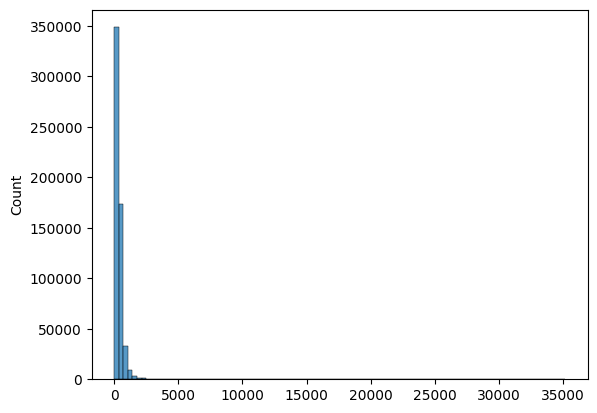

In [1]:
from Bio import SeqIO
import seaborn as sns

records = list(SeqIO.parse("../data/swissprot/uniprot_sprot.fasta", "fasta"))
seqs = [str(record.seq) for record in records]
seq_lens = [len(seq) for seq in seqs]
sns.histplot(seq_lens, bins=100)

In [5]:
import numpy as np

seq_lens = np.array(seq_lens)
(seq_lens <= 1022).sum(), len(seq_lens), (seq_lens <= 1022).sum() / len(seq_lens)

(552778, 570830, 0.9683758737277298)

In [6]:
# filter out sequences longer than 1022 and shorter than 10
import numpy as np
from Bio import SeqIO

records = list(SeqIO.parse("../data/swissprot/uniprot_sprot.fasta", "fasta"))
seqs = [str(record.seq) for record in records]
seq_lens = [len(seq) for seq in seqs]
seq_lens = np.array(seq_lens)
mask = (seq_lens <= 1022) & (seq_lens >= 10)
records = [record for record, m in zip(records, mask) if m]
SeqIO.write(records, "../data/swissprot/uniprot_sprot_10_1022.fasta", "fasta")
len(records)

551965

In [7]:
records = list(SeqIO.parse("../data/swissprot/uniprot_sprot_10_1022.fasta", "fasta"))
seqs = [str(record.seq) for record in records]
seq_lens = [len(seq) for seq in seqs]
seq_lens = np.array(seq_lens)
print(max(seq_lens), min(seq_lens), len(records))
(seq_lens < 10).sum()

1022 10 551965


0

<Axes: ylabel='Count'>

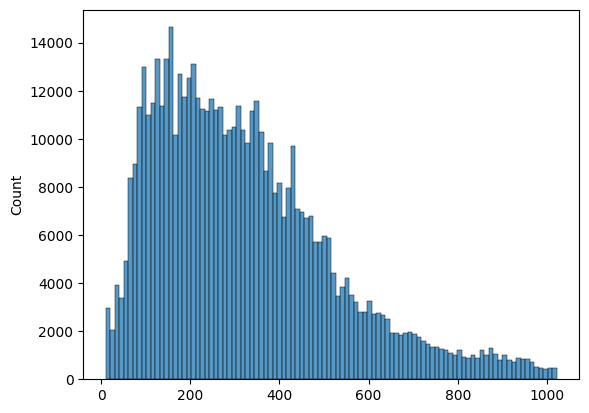

In [8]:
import seaborn as sns
sns.histplot(seq_lens, bins=100)

In [9]:
records[0].id

'sp|Q6GZX4|001R_FRG3G'

In [12]:
import torch

data = torch.load('../data/esm2_test.pt')
data['sp|A0A0C5B5G6|MOTSC_HUMAN'].shape

torch.Size([1280])

In [14]:
551965 // 4 *1, 551965 // 4 *2, 551965 // 4 *3, 551965 // 4 *4

(137991, 275982, 413973, 551964)

In [ ]:
# python scripts/generate_esm_emb.py --input data/swissprot/uniprot_sprot_10_1022.fasta --output data/embeddings/sprot_10_1022_esm2_t33_batch_0.pt --start 0 --end 137991 --device cuda:0
# python scripts/generate_esm_emb.py --input data/swissprot/uniprot_sprot_10_1022.fasta --output data/embeddings/sprot_10_1022_esm2_t33_batch_1.pt --start 137991 --end 275982 --device cuda:1
# python scripts/generate_esm_emb.py --input data/swissprot/uniprot_sprot_10_1022.fasta --output data/embeddings/sprot_10_1022_esm2_t33_batch_2.pt --start 275982 --end 413973 --device cuda:2
# python scripts/generate_esm_emb.py --input data/swissprot/uniprot_sprot_10_1022.fasta --output data/embeddings/sprot_10_1022_esm2_t33_batch_3.pt --start 413973 --end 551965 --device cuda:3

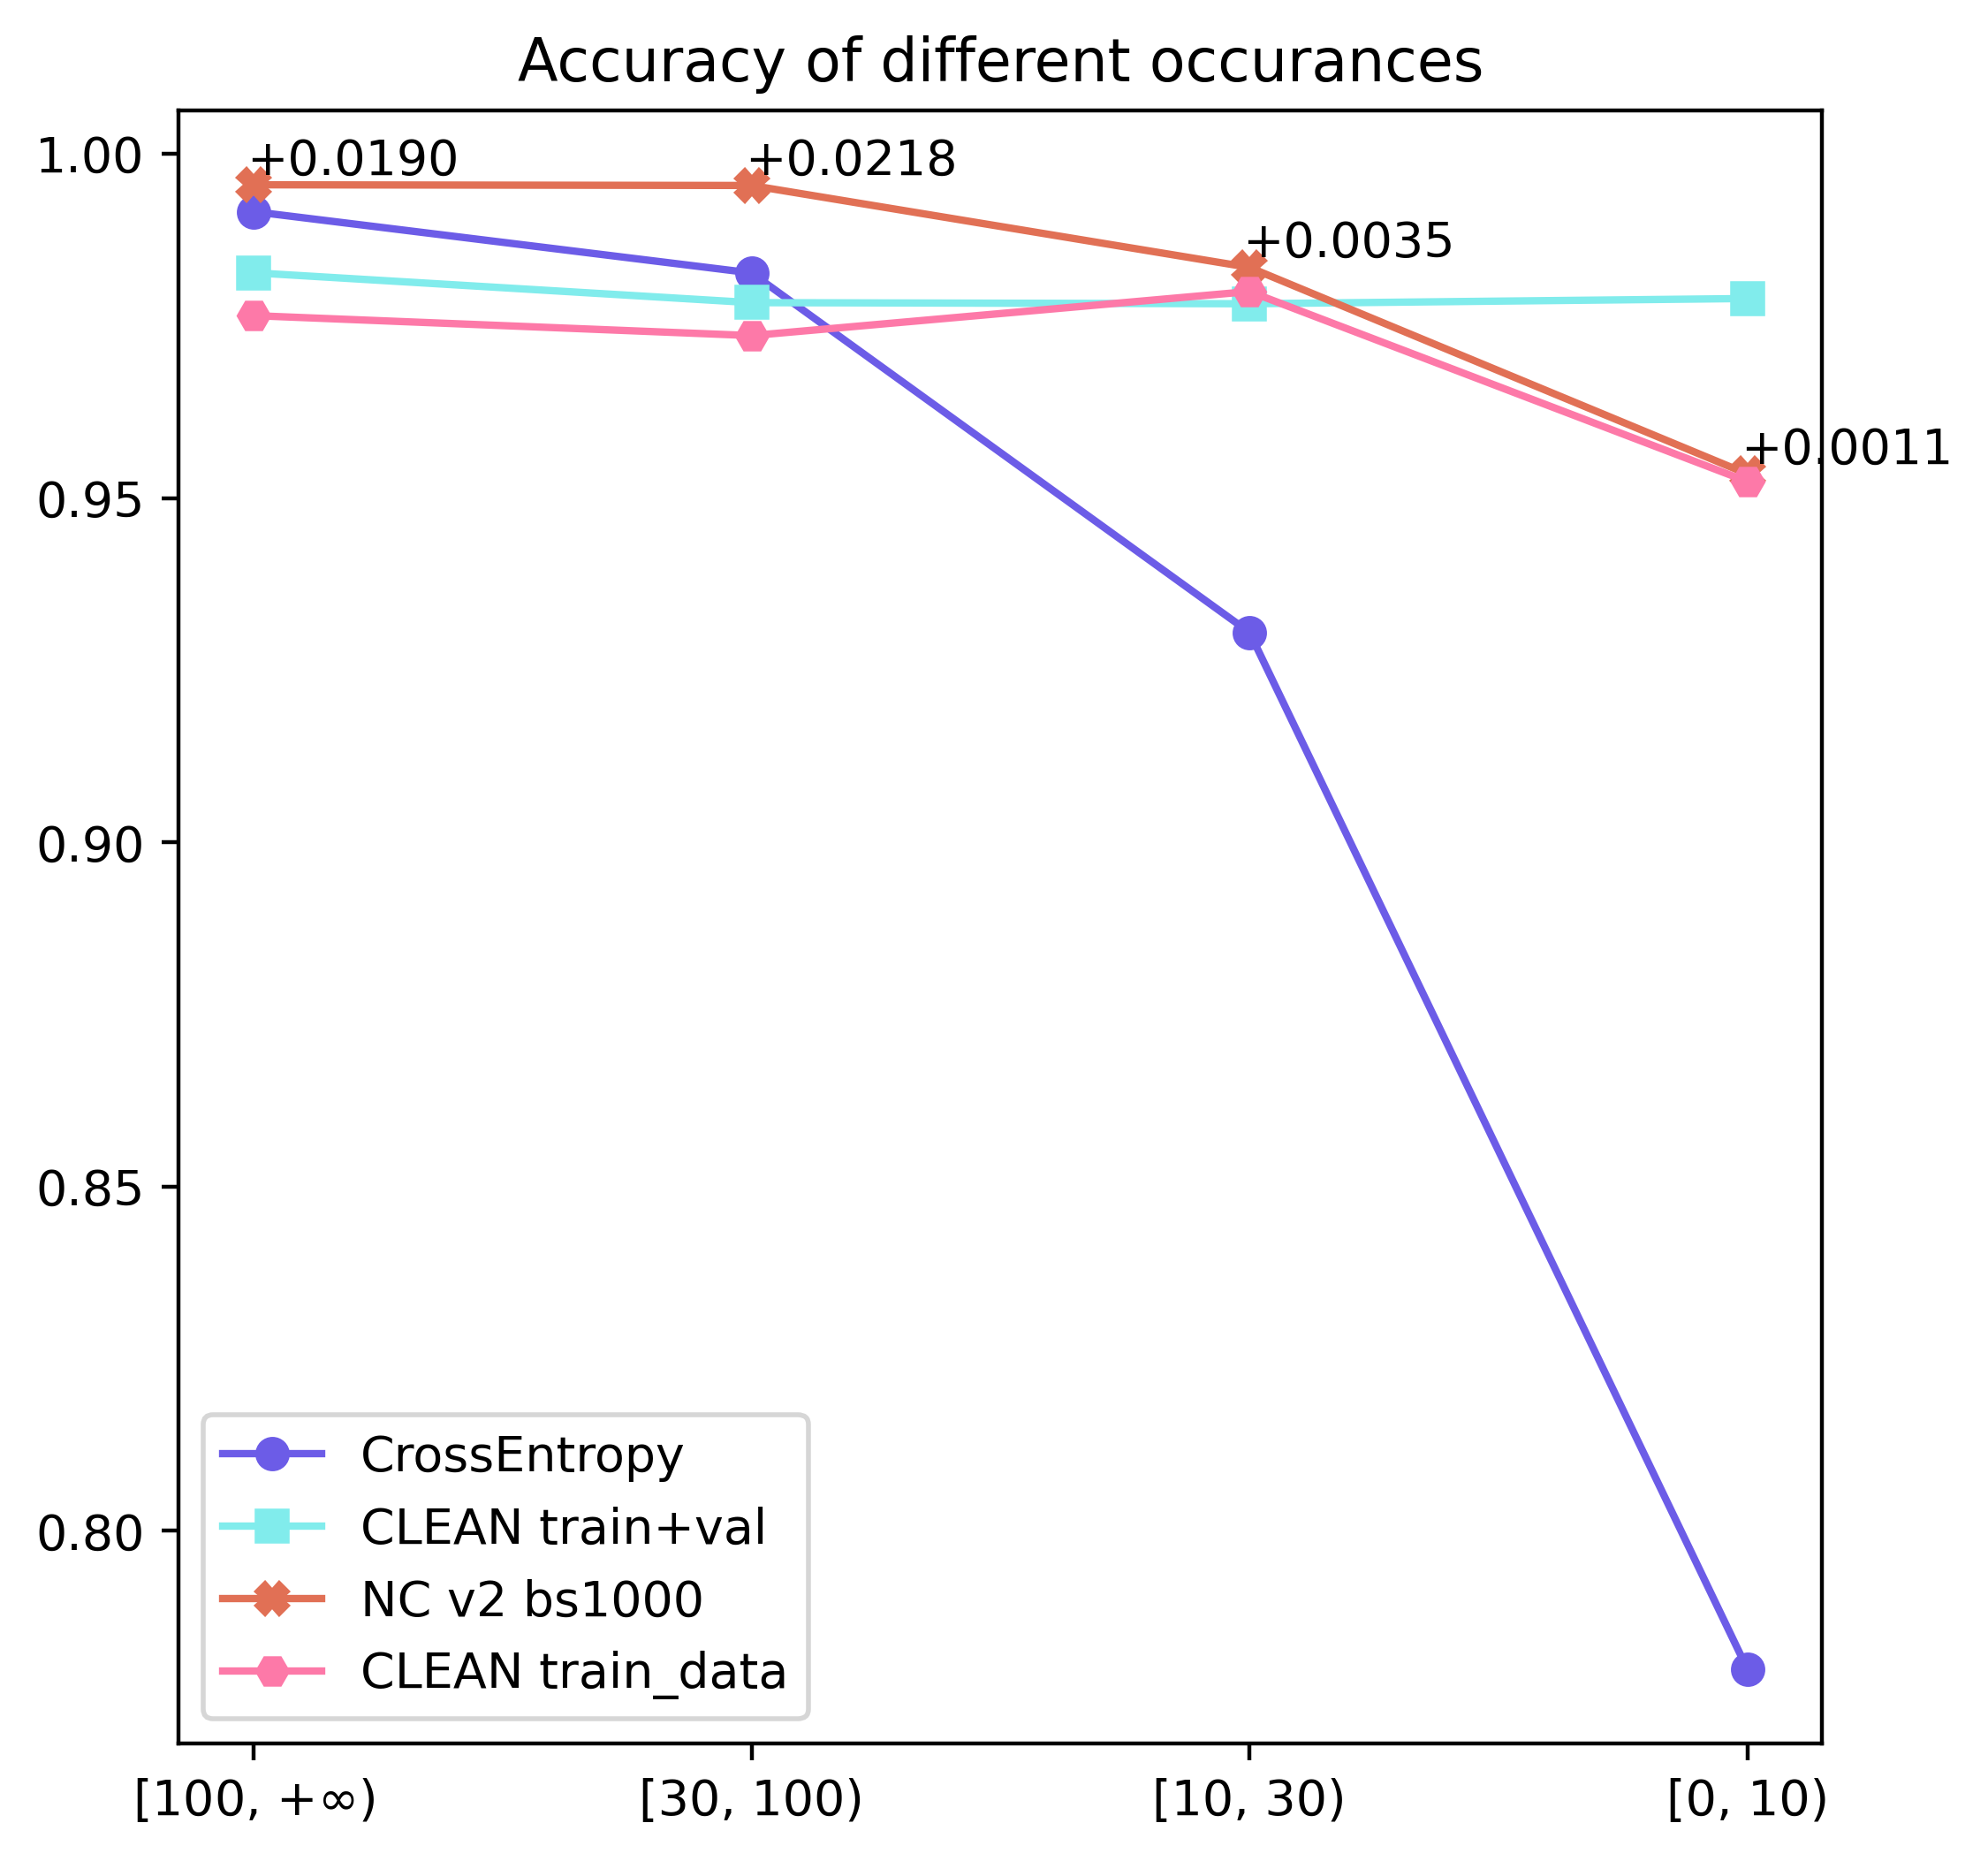

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 0.7799	0.9305	0.9827	0.9916 reverse order
CE_results = np.array([0.9916, 0.9827, 0.9305, 0.7799])
# 0.7611	0.9682	0.9857	0.994
NC_results = np.array([0.994, 0.9857, 0.9682, 0.7611])
# {"[100, +$\\infty$)": 0.9827226261608235, "[30, 100)": 0.9783845278725825, "[10, 30)": 0.9782224838140082, "[0, 10)": 0.9789823008849557}
CLEAN_results = np.array([0.9827226261608235, 0.9783845278725825, 0.9782224838140082, 0.9789823008849557])
# {"[100, +$\\infty$)": 0.9938089410409617, "[30, 100)": 0.9870307167235495, "[10, 30)": 0.9652736904061212, "[0, 10)": 0.9314159292035398}
CLEAN_CE_results = np.array([0.9938089410409617, 0.9870307167235495, 0.9652736904061212, 0.9314159292035398])
# {"[100, +$\\infty$)": 0.9955366784248795, "[30, 100)": 0.9881683731513083, "[10, 30)": 0.9770453207769276, "[0, 10)": 0.9314159292035398}
CLEAN_NC_results = np.array([0.9955366784248795, 0.9881683731513083, 0.9770453207769276, 0.9314159292035398])
# {"[100, +$\\infty$)": 0.981, "[30, 100)": 0.975, "[10, 30)": 0.8991, "[0, 10)": 0.6905}
sprof_CE_results = np.array([0.981, 0.975, 0.9436, 0.6905])
# {"[100, +$\\infty$)": 0.990, "[30, 100)": 0.981, "[10, 30)": 0.9026, "[0, 10)": 0.6609}
fine_to_coarse_hierarchical_CE_results = np.array([0.990, 0.981, 0.9026, 0.6609])
# {"[100, +$\\infty$)": 0.9992458859719858, "[30, 100)": 0.9973744179134053, "[10, 30)": 0.9892367028433043, "[0, 10)": 0.5958718087995655}
# NC_only_results = np.array([0.9992458859719858, 0.9973744179134053, 0.9892367028433043, 0.5958718087995655])
# 0.9954 0.9929 0.9800 0.8761
NC_only_results = np.array([0.9954, 0.9929, 0.9800, 0.8761])
# 0.9955 0.9954 0.9835 0.9535
NC_v2_results = np.array([0.9955, 0.9954, 0.9835, 0.9535])
# {"[100, +$\\infty$)": 0.9953207112518897, "[30, 100)": 0.9943117178612059, "[10, 30)": 0.9829311359623308, "[0, 10)": 0.9435840707964602}
NC_only_bs40000_results = np.array([0.9953207112518897, 0.9943117178612059, 0.9829311359623308, 0.9435840707964602])
# 0.9765;0.9736;0.9800;0.9524;
CLEAN_train_only_results = np.array([0.9765, 0.9736, 0.9800, 0.9524])

xsticks = ['[100, +$\infty$)', '[30, 100)', '[10, 30)', '[0, 10)']
diff = NC_v2_results - CLEAN_train_only_results

fig, ax = plt.subplots(figsize=(6, 6), dpi=400)
# a different color for each line
color_list = ['#6c5ce7', '#d63031', '#81ecec', '#fd79a8', '#2d3436', '#00b894', '#d63031', '#e17055']
ax.plot(CE_results, label='CrossEntropy', marker='o', color='#6c5ce7')
# ax.plot(NC_results, label='CE+NC', marker='^', color='#d63031')
ax.plot(CLEAN_results, label='CLEAN train+val', marker='s', color='#81ecec')
# ax.plot(CLEAN_CE_results, label='CLEAN+CE', marker='p', color='#fd79a8')
# ax.plot(CLEAN_NC_results, label='CLEAN+NC', marker='P', color='#2d3436')
# ax.plot(NC_only_results, label='NC bs2000', marker='*', color='#00b894')
# ax.plot(NC_only_bs40000_results, label='NC bs40000', marker='D', color='#d63031')
ax.plot(NC_v2_results, label='NC v2 bs1000', marker='X', color='#e17055')
ax.plot(CLEAN_train_only_results, label='CLEAN train_data', marker='H', color='#fd79a8')
for i in range(len(diff)):
    ax.text(i+0.2, NC_v2_results[i], f'{"+" if diff[i] > 0 else ""}{diff[i]:.4f}', ha='center', va='bottom')
ax.legend()
ax.set_xticks(range(len(xsticks)), xsticks)
ax.set_title('Accuracy of different occurances')

plt.show()

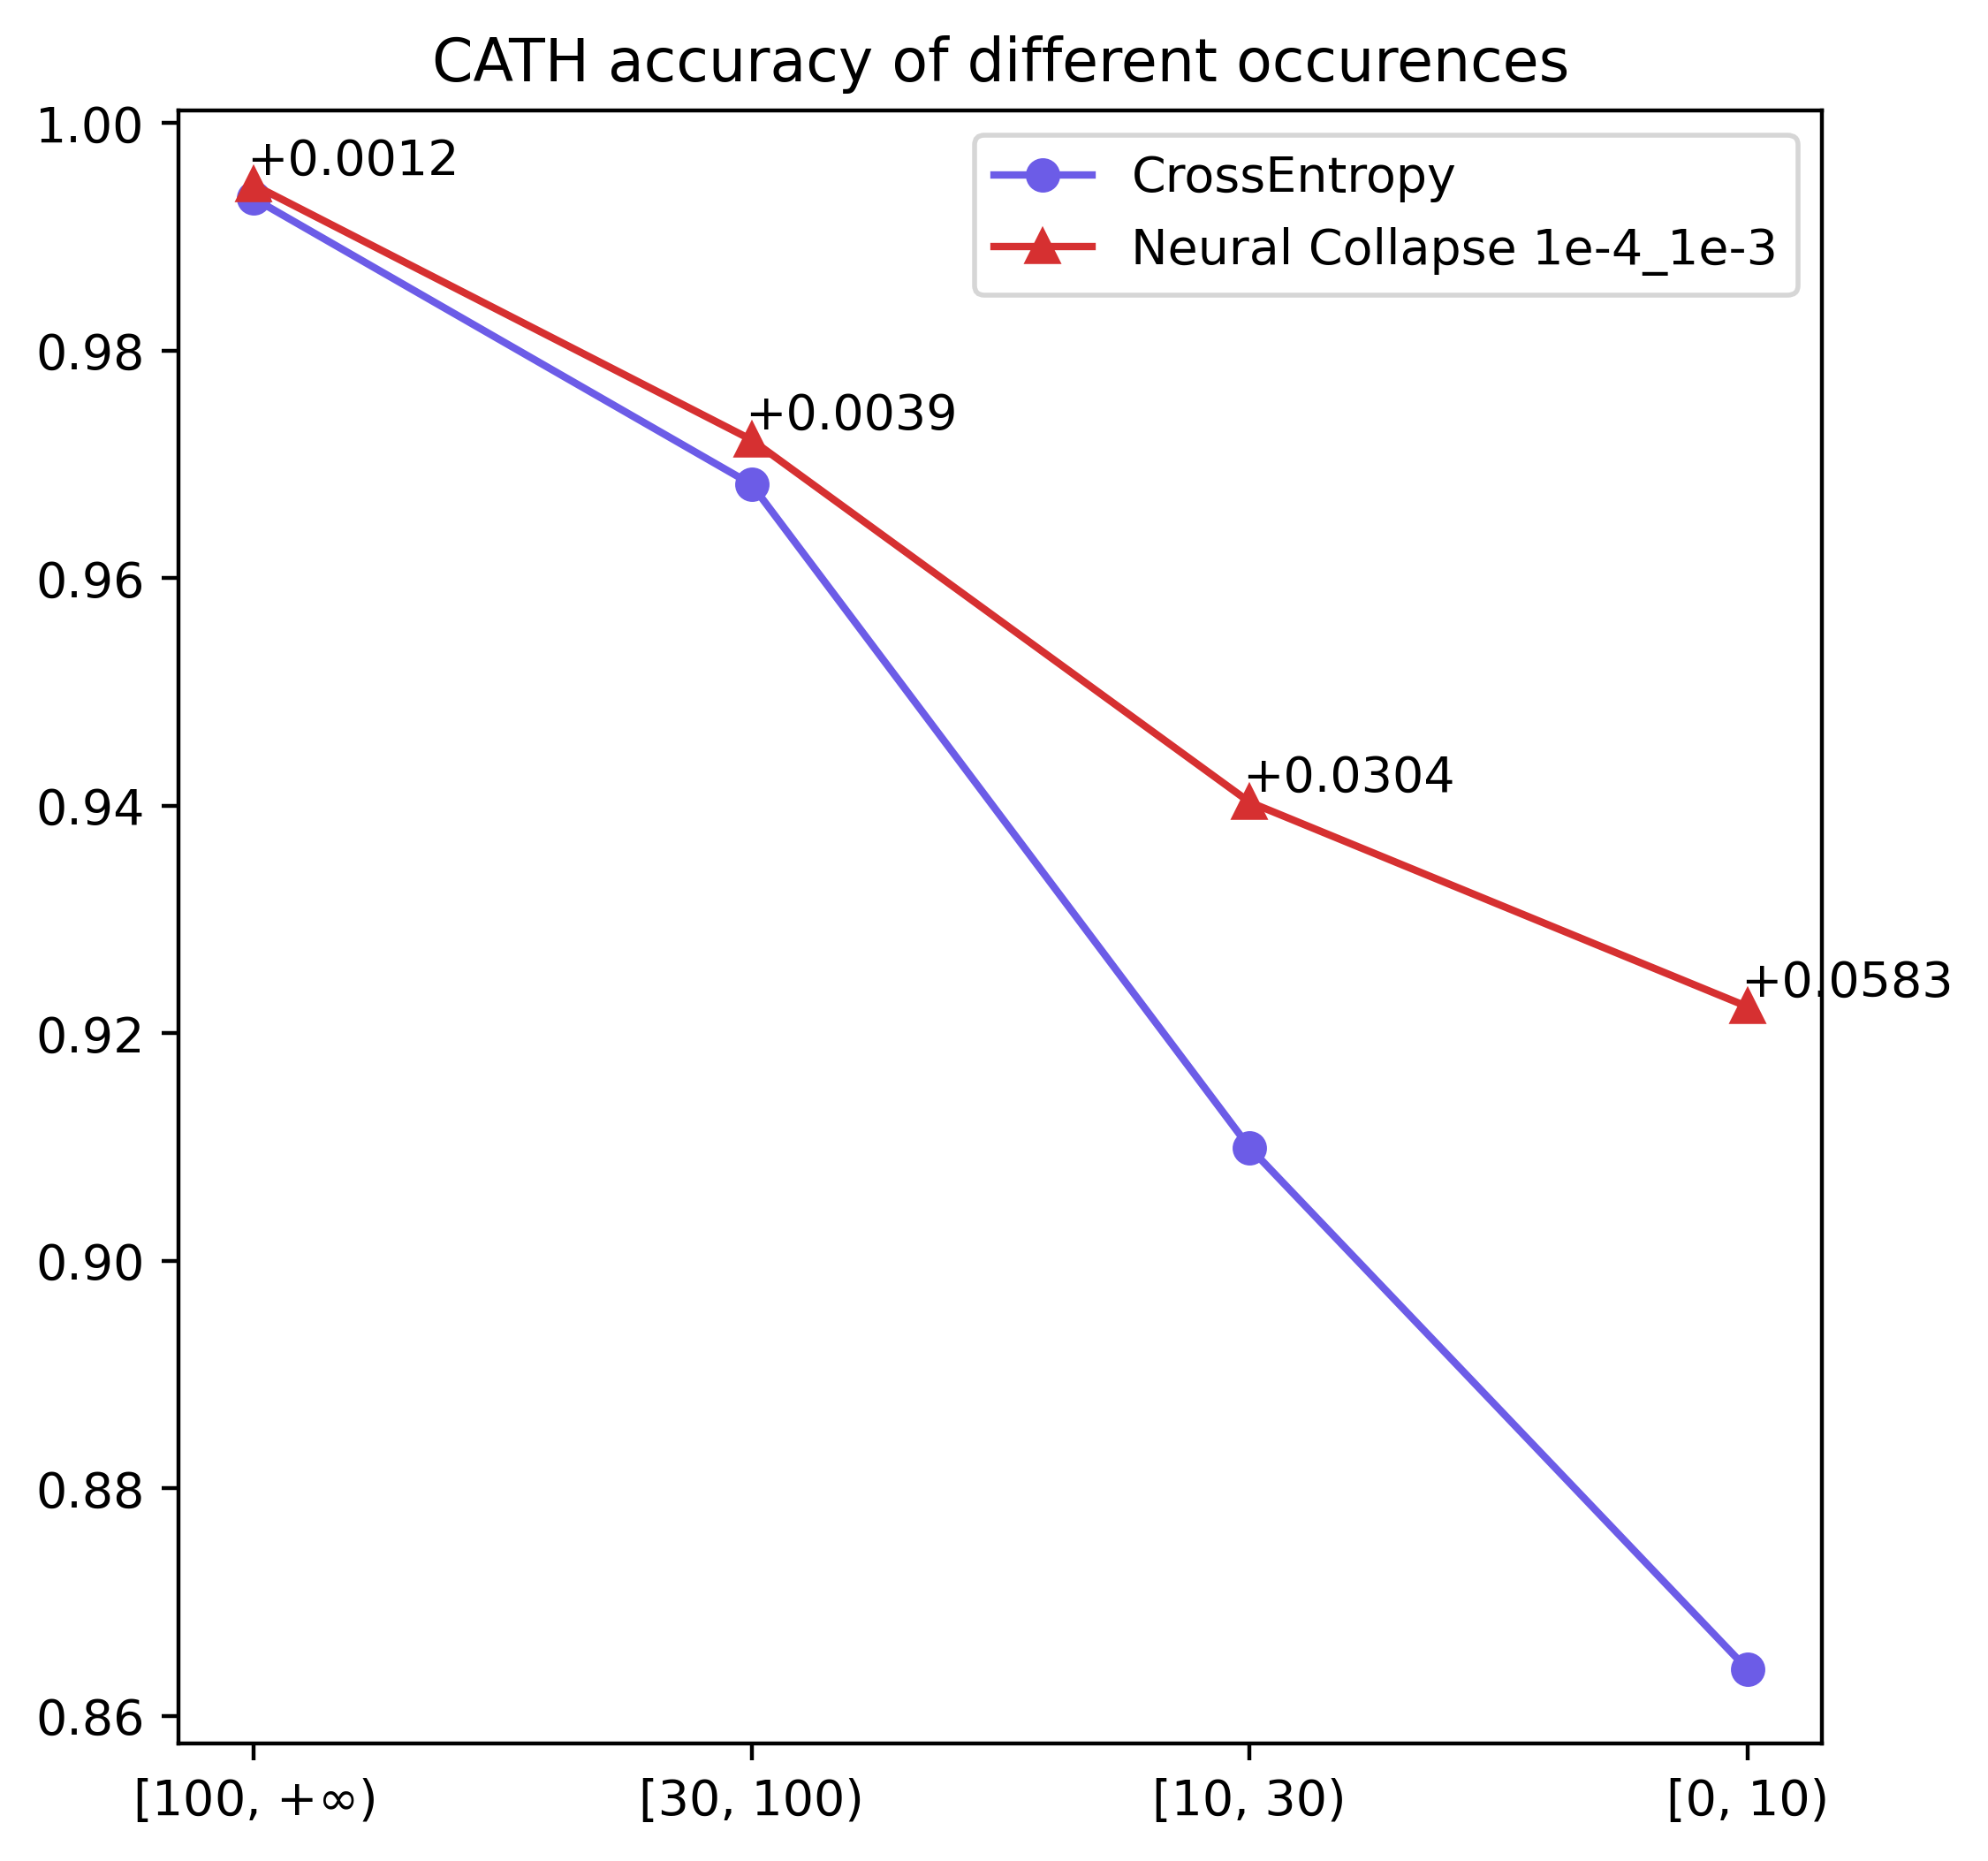

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# {"[100, +$\\infty$)": 0.9933951479740887, "[30, 100)": 0.9682470639408438, "[10, 30)": 0.9099476439790576, "[0, 10)": 0.8640776699029126}
CE_results = np.array([0.9933951479740887, 0.9682470639408438, 0.9099476439790576, 0.8640776699029126])
# {"[100, +$\\infty$)": 0.9945806342351496, "[30, 100)": 0.9721618094823836, "[10, 30)": 0.9403141361256544, "[0, 10)": 0.9223300970873787}
NC_results = np.array([0.9945806342351496, 0.9721618094823836, 0.9403141361256544, 0.9223300970873787])

xsticks = ['[100, +$\infty$)', '[30, 100)', '[10, 30)', '[0, 10)']
diff = NC_results - CE_results

fig, ax = plt.subplots(figsize=(6, 6), dpi=400)
ax.plot(CE_results, label='CrossEntropy', marker='o', color='#6c5ce7')
ax.plot(NC_results, label='Neural Collapse 1e-4_1e-3', marker='^', color='#d63031')
for i in range(len(diff)):
    ax.text(i+0.2, NC_results[i], f'{"+" if diff[i] > 0 else ""}{diff[i]:.4f}', ha='center', va='bottom')
ax.legend()
ax.set_xticks(range(len(xsticks)), xsticks)
ax.set_title('CATH accuracy of different occurences')

plt.show()

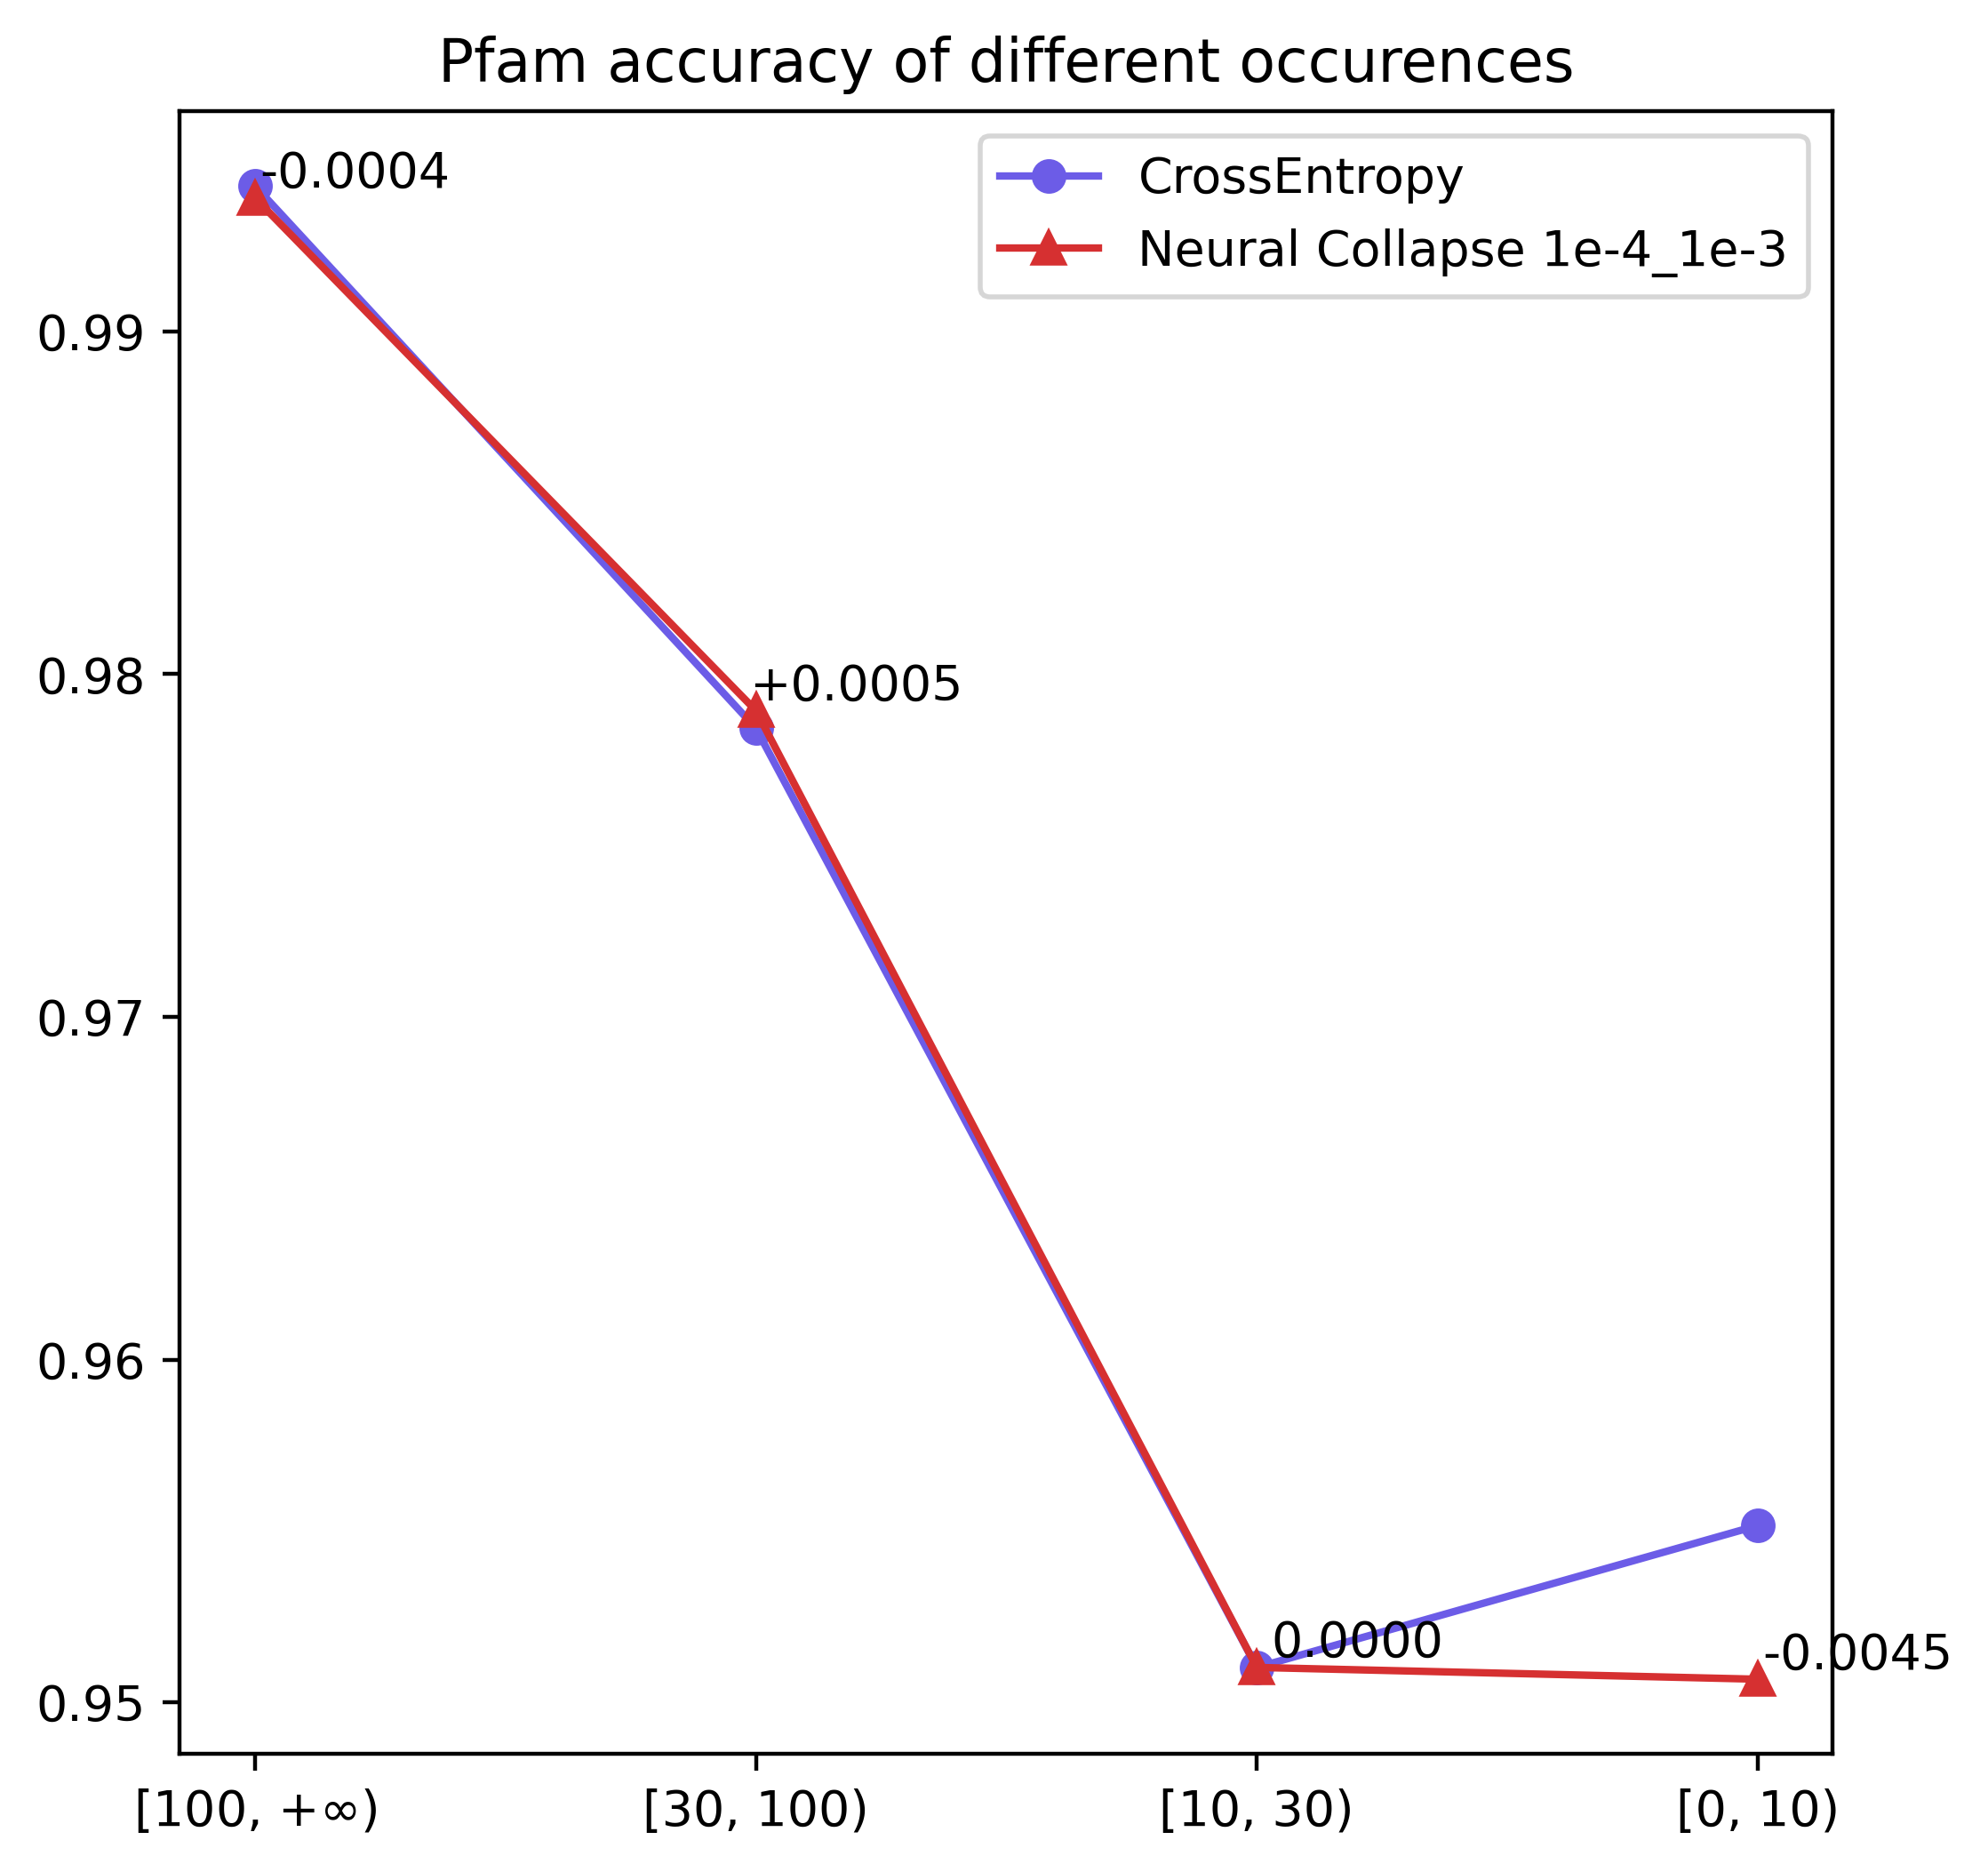

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# {"[100, +$\\infty$)": 0.9942480790340286, "[30, 100)": 0.9784246575342466, "[10, 30)": 0.9510163278907031, "[0, 10)": 0.9551569506726457}
CE_results = np.array([0.9942480790340286, 0.9784246575342466, 0.9510163278907031, 0.9551569506726457])
# {"[100, +$\\infty$)": 0.9938968166849615, "[30, 100)": 0.9789383561643835, "[10, 30)": 0.9510163278907031, "[0, 10)": 0.9506726457399103}
NC_results = np.array([0.9938968166849615, 0.9789383561643835, 0.9510163278907031, 0.9506726457399103])

xsticks = ['[100, +$\infty$)', '[30, 100)', '[10, 30)', '[0, 10)']
diff = NC_results - CE_results

fig, ax = plt.subplots(figsize=(6, 6), dpi=400)
ax.plot(CE_results, label='CrossEntropy', marker='o', color='#6c5ce7')
ax.plot(NC_results, label='Neural Collapse 1e-4_1e-3', marker='^', color='#d63031')
for i in range(len(diff)):
    ax.text(i+0.2, NC_results[i], f'{"+" if diff[i] > 0 else ""}{diff[i]:.4f}', ha='center', va='bottom')
ax.legend()
ax.set_xticks(range(len(xsticks)), xsticks)
ax.set_title('Pfam accuracy of different occurences')

plt.show()

In [5]:
for i in range(100000, 170000):
    # set of the digits of i
    set1 = sorted(list(str(i)))
    set2 = sorted(list(str(i*2)))
    set3 = sorted(list(str(i*3)))
    set4 = sorted(list(str(i*4)))
    set5 = sorted(list(str(i*5)))
    set6 = sorted(list(str(i*6)))
    # if all sets are equal
    if set1 == set2 == set3 == set4 == set5 == set6:
        print(i, i*2, i*3, i*4, i*5, i*6)
        

142857 285714 428571 571428 714285 857142


In [4]:
import torch

test_means = torch.randn(8, 2000)
test_norm = torch.norm(test_means, dim=1)
test_norm

tensor([45.4599, 45.8103, 44.4241, 44.1048, 43.8422, 44.6204, 44.4375, 44.3279])

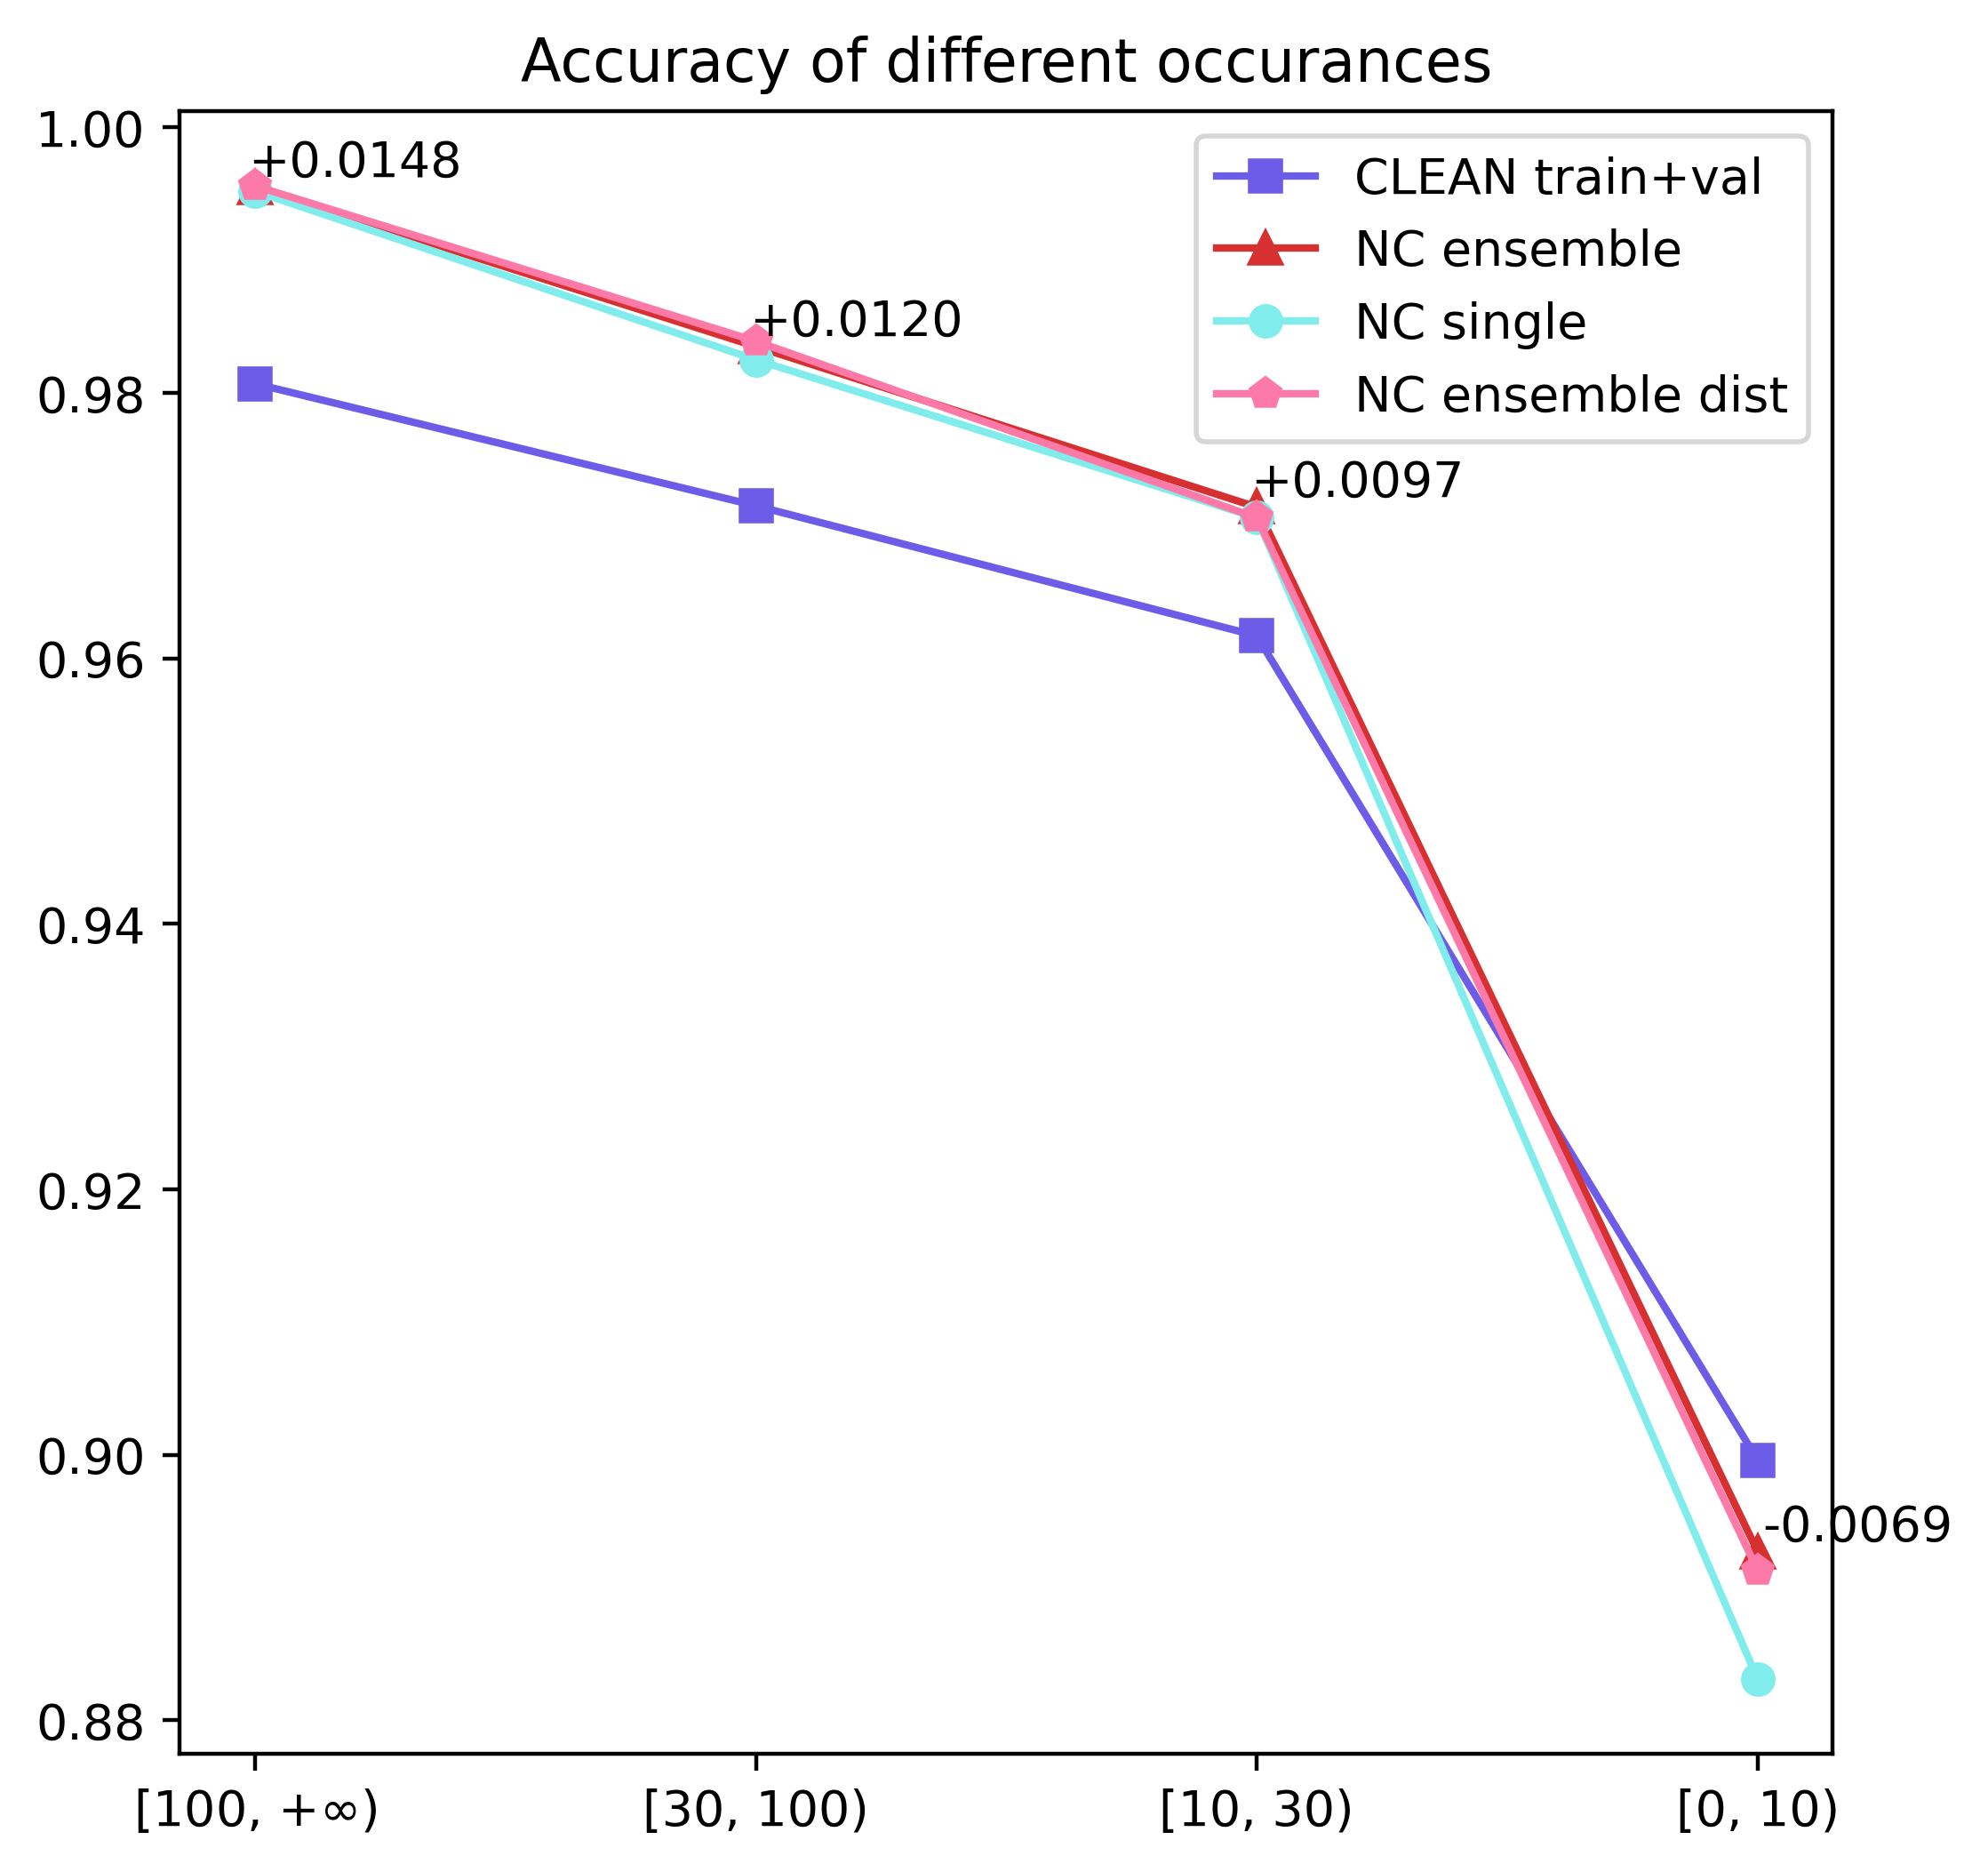

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 0.9955 0.9835 0.9714 0.8927
NC_ensemble_results = np.array([0.9955, 0.9835, 0.9714, 0.8927])
# 0.9807;0.9715;0.9617;0.8996;
CLEAN_results = np.array([0.9807, 0.9715, 0.9617, 0.8996])
# 0.9952 0.9825 0.9706 0.8831
NC_single_results = np.array([0.9952, 0.9825, 0.9706, 0.8831])
# 0.9956 0.9839 0.9706 0.8913
NC_ensemble_dist_results = np.array([0.9956, 0.9839, 0.9706, 0.8913])

xsticks = ['[100, +$\infty$)', '[30, 100)', '[10, 30)', '[0, 10)']
diff = NC_ensemble_results - CLEAN_results

fig, ax = plt.subplots(figsize=(6, 6), dpi=400)
# a different color for each line
color_list = ['#6c5ce7', '#d63031', '#81ecec', '#fd79a8', '#2d3436', '#00b894', '#d63031', '#e17055']
ax.plot(CLEAN_results, label='CLEAN train+val', marker='s', color=color_list[0])
ax.plot(NC_ensemble_results, label='NC ensemble', marker='^', color=color_list[1])
ax.plot(NC_single_results, label='NC single', marker='o', color=color_list[2])
ax.plot(NC_ensemble_dist_results, label='NC ensemble dist', marker='p', color=color_list[3])

for i in range(len(diff)):
    ax.text(i+0.2, NC_ensemble_results[i], f'{"+" if diff[i] > 0 else ""}{diff[i]:.4f}', ha='center', va='bottom')
ax.legend()
ax.set_xticks(range(len(xsticks)), xsticks)
ax.set_title('Accuracy of different occurances')

plt.show()

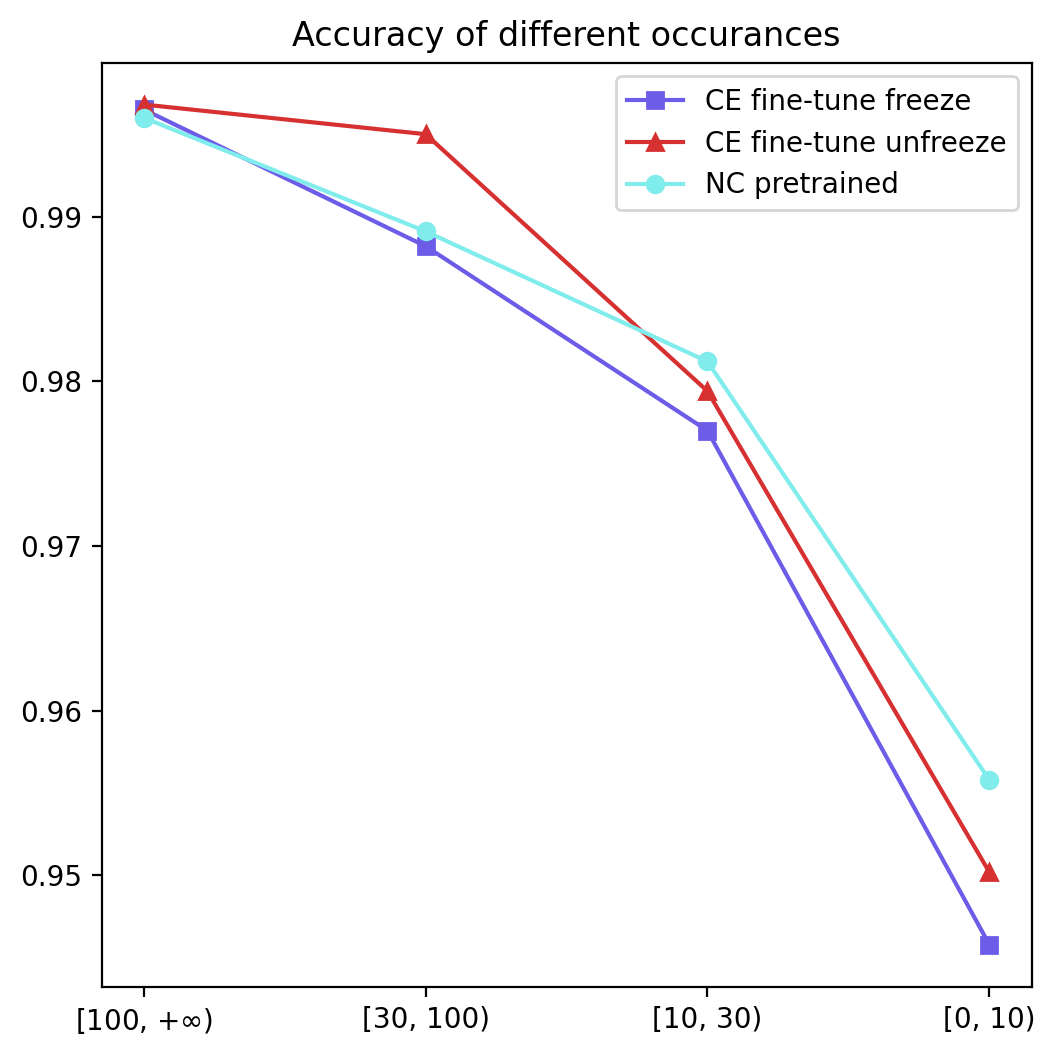

In [4]:
# 0.9965 0.9882 0.9770 0.9458
fine_tune_CE_freeze_results = np.array([0.9965, 0.9882, 0.9770, 0.9458])
# 0.9968  0.9950  0.9794  0.9502
fine_tune_CE_unfreeze_results = np.array([0.9968, 0.9950, 0.9794, 0.9502])
# 0.9960  0.9891  0.9812 0.9558
pretrained_NC_results = np.array([0.9960, 0.9891, 0.9812, 0.9558])

xsticks = ['[100, +$\infty$)', '[30, 100)', '[10, 30)', '[0, 10)']
diff = NC_ensemble_results - CLEAN_results

fig, ax = plt.subplots(figsize=(6, 6), dpi=200)
# a different color for each line
color_list = ['#6c5ce7', '#d63031', '#81ecec', '#fd79a8', '#2d3436', '#00b894', '#d63031', '#e17055']
ax.plot(fine_tune_CE_freeze_results, label='CE fine-tune freeze', marker='s', color=color_list[0])
ax.plot(fine_tune_CE_unfreeze_results, label='CE fine-tune unfreeze', marker='^', color=color_list[1])
ax.plot(pretrained_NC_results, label='NC pretrained', marker='o', color=color_list[2])

# for i in range(len(diff)):
#     ax.text(i+0.2, NC_ensemble_results[i], f'{"+" if diff[i] > 0 else ""}{diff[i]:.4f}', ha='center', va='bottom')
ax.legend()
ax.set_xticks(range(len(xsticks)), xsticks)
ax.set_title('Accuracy of different occurances')

plt.show()

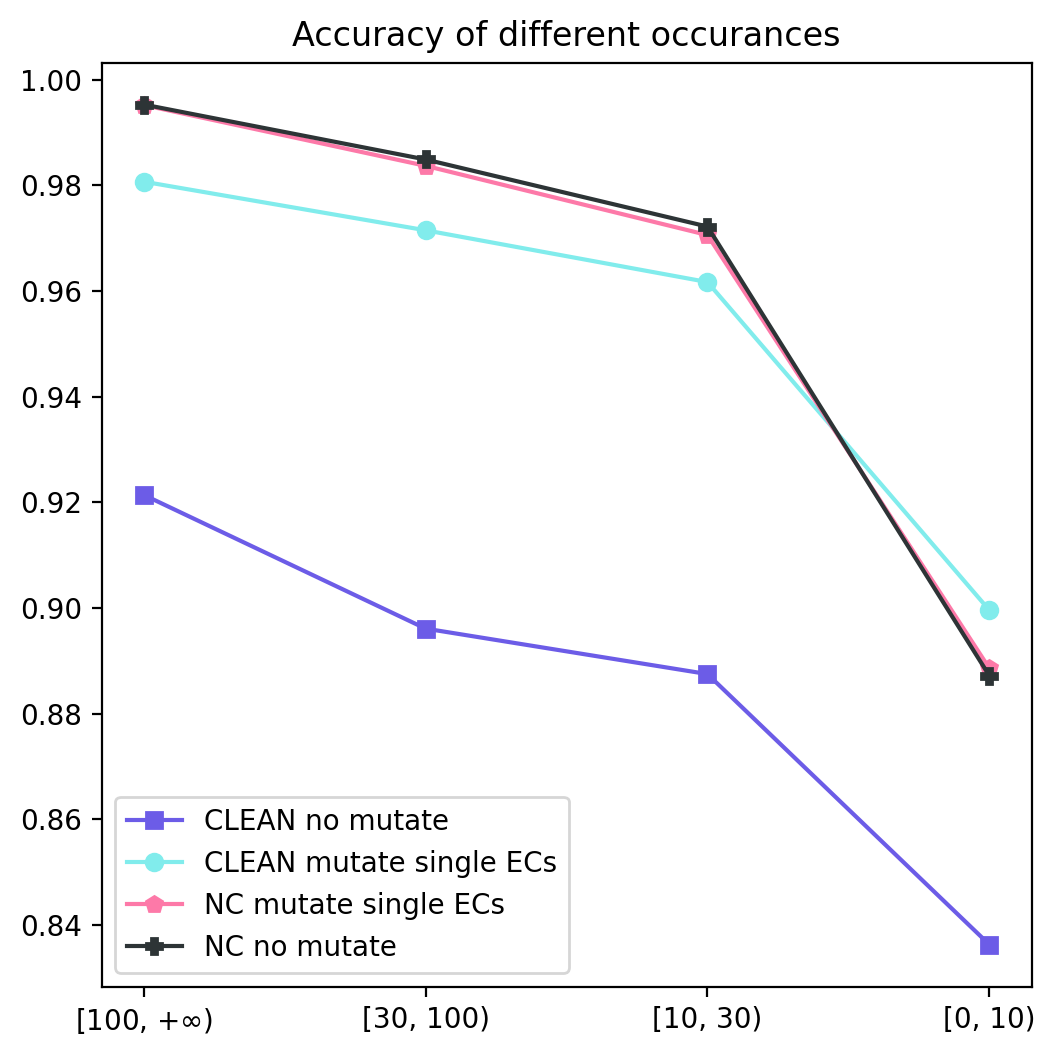

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 0.9214; 0.8961; 0.8875; 0.8363;
CLEAN_no_mutate_results = np.array([0.9214, 0.8961, 0.8875, 0.8363])
# 0.9955 0.9835 0.9714 0.8927
NC_ensemble_results = np.array([0.9955, 0.9835, 0.9714, 0.8927])
# 0.9807;0.9715;0.9617;0.8996;
CLEAN_mutate_single_ECs_results = np.array([0.9807, 0.9715, 0.9617, 0.8996])
# 0.9952 0.9837 0.9706 0.8886
NC_mutate_single_ECs_results = np.array([0.9952, 0.9837, 0.9706, 0.8886])
# 0.9953 0.9849 0.9722 0.8872
NC_no_mutate_results = np.array([0.9953, 0.9849, 0.9722, 0.8872])

xsticks = ['[100, +$\infty$)', '[30, 100)', '[10, 30)', '[0, 10)']
diff = NC_ensemble_results - CLEAN_no_mutate_results

fig, ax = plt.subplots(figsize=(6, 6), dpi=200)
# a different color for each line
color_list = ['#6c5ce7', '#d63031', '#81ecec', '#fd79a8', '#2d3436', '#00b894', '#d63031', '#e17055']
ax.plot(CLEAN_no_mutate_results, label='CLEAN no mutate', marker='s', color=color_list[0])
# ax.plot(NC_ensemble_results, label='NC ensemble', marker='^', color=color_list[1])
ax.plot(CLEAN_mutate_single_ECs_results, label='CLEAN mutate single ECs', marker='o', color=color_list[2])
ax.plot(NC_mutate_single_ECs_results, label='NC mutate single ECs', marker='p', color=color_list[3])
ax.plot(NC_no_mutate_results, label='NC no mutate', marker='P', color=color_list[4])

# for i in range(len(diff)):
#     ax.text(i+0.2, NC_ensemble_results[i], f'{"+" if diff[i] > 0 else ""}{diff[i]:.4f}', ha='center', va='bottom')
ax.legend()
ax.set_xticks(range(len(xsticks)), xsticks)
ax.set_title('Accuracy of different occurances')

plt.show()